In [49]:
import numpy as np
import pandas as pd 
import scipy.stats 
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [3]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
missing_values = data.isnull().sum()#пропусков нет
print(missing_values)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


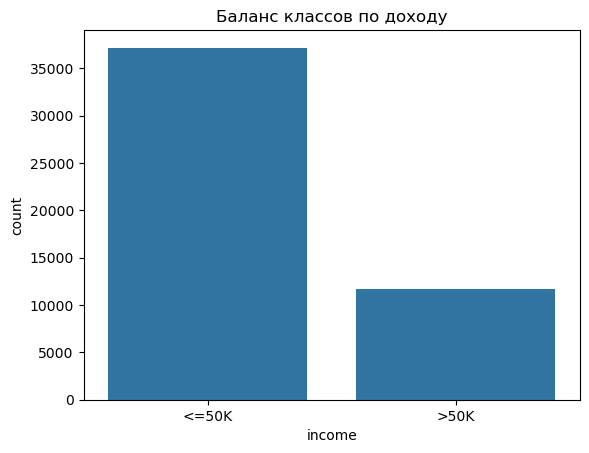

In [9]:
sns.countplot(x='income', data=data)
plt.title('Баланс классов по доходу')
plt.show()

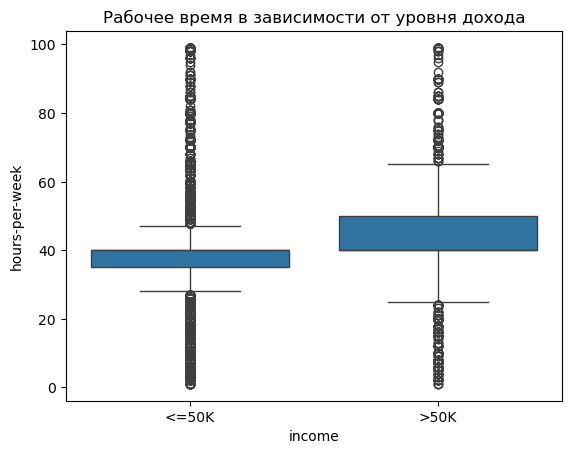

In [11]:
sns.boxplot(x='income', y='hours-per-week', data=data)
plt.title('Рабочее время в зависимости от уровня дохода')
plt.show()

In [15]:
cat_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

In [17]:
encoder = OneHotEncoder(drop='first')  
encoded_data = encoder.fit_transform(data[cat_features])
numeric_cols = data.select_dtypes(include=['number'])
X = pd.concat([pd.DataFrame(encoded_data.toarray()), numeric_cols], axis=1)
y = (data['income'] == '>50K').astype(int)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values

In [27]:
log_reg = LogisticRegression(max_iter=5000)  
log_reg.fit(X_train, y_train)

C:\Users\svshi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [29]:
y_pred_logreg = log_reg.predict(X_test)

In [31]:
accuracy_lr = accuracy_score(y_test, y_pred_logreg)
print(f"Точность логистической регрессии: {accuracy_lr:.4f}")

Точность логистической регрессии: 0.8535


In [33]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7479
           1       0.73      0.60      0.66      2290

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769



In [51]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')




In [53]:
svm_model.fit(X_train, y_train)

SVC()

In [55]:
y_pred = svm_model.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность SVM: {accuracy:.4f}")

Точность SVM: 0.8034


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      7479
           1       0.96      0.17      0.29      2290

    accuracy                           0.80      9769
   macro avg       0.88      0.58      0.59      9769
weighted avg       0.83      0.80      0.75      9769



Исходные данные были разделены на обучающую и тестовую выборки (80% на обучение, 20% на проверку).
Были применены стандартные этапы подготовки данных, включая обработку пропущенных значений и преобразование категориальных признаков (например, с помощью One-Hot Encoding).
Целевая переменная была преобразована в числовой формат (бинарная классификация).

Логистическая регрессия показала лучшую точность по основным показателям:
Точность (Accuracy) составила 85%.
Показатели F1-Score и среднего значения (macro avg) оказались выше у логистической регрессии.
Модель SVM продемонстрировала худшие результаты:
Несмотря на высокую точность для класса 0 (точность равна 1.00), показатель recall для класса 1 крайне низок (всего 0.17), что снижает среднюю эффективность модели.
Общая точность SVM оказалась заметно ниже — около 80%.

Обе модели показали приемлемые результаты в плане общей точности, но логистическая регрессия значительно превосходит SVM по ключевым показателям.
Результаты указывают на необходимость дополнительного внимания к классу 1 в модели SVM, так как низкая чувствительность (Recall) ограничивает полезность модели для практических приложений.
В целом, логистическая регрессия справляется с задачей намного лучше, демонстрируя хорошую способность различать классы и достигать высокого уровня точности.